# Modeling Runner's Times in Cherry Blossom Race

Daniel Byrne, Joanna Duran

9/19/19

## Abstract

We analyze the Cherry Blossom 10 Mile race results in order to assess if the age distributions of racers change over the years. We compare the age distributions of the runners across the years 1999-2012. We utilize box plots and density curves to make our comparisons. We will answer "How do the distributions change over the years?" and "Was it a gradual change?"


## Introduction

Running for pleasure in a slightly competitive run, often for charity has become a weekend pleasure for many a health enthusiast across the United States. Races tend to be sponsored by corporate benefactors and the successful ones continue the competitions yearly. In most of these races, lots of data is collected by the race organizers and racing services. This data is generally published on the individual race's website or on the racing services website. Often also the race organizers post the race data on their website. This data is freely accessible and can give quite a bit of insight about runner's performance over time as well as participants demographics. We study the relationship between age of the participants and the race year to see if races have attracted the same or varying age participants as the years have gone on.    

In this paper we examine the data from the Cherry Blossom Ten Mile Run held in Washington D.C. held annually in early April when the cherry trees in bloom. The Cherry Blossom race started in 1973.  It is used as a lead in competition for elite runners planning to compete in the Boston Marathon. 

Earlier [research][1] by Kaplan and Nolan had shown that 1999 runners were typically older than the 2012 runners. We compare the age distributions of male runners across the years 1999 - 2012.  We will answer "How do the distributions change over the years?" and "Was it a gradual change?"

## Methods

We began by first investigating the data mining approach used by Nolan and Kaplan.  It was extensive and comprehensive approach that worked well for the race data as it was presented on the [Cherry Blossom Race Results website][2] at the time of the study.  Since its publication however, the  website has changed their data repository, and so we took this opportunity to explore new ways to mine the data that could possibly be extended across all years to include the original study range and the years competed since and also prior to 1999.  

The mining approach we took was to use the CRAN r package rvest to identify the table on the results page that is updated to contain the data specified by the search parameters and the page number.  We then looped through the pages of data over the period of interest by varying the search parameters and recording the data in UTF-8 csv files for each year 1999-2014. 

The code to scrape the data in its newest form was easier to implement and thus less error prone than the original.  The code consists of simple 2 r functions
- `getResults(uri, year = 1999)` - Loops over every available page of datafor the selected year.
- `getAll()` - Loops over the years 1999-2014 and saves each year's data in a csv file.

The scraping code r code is listed in `cbreaddata.r`.

We limit our data to the Men's datasets. The variables available in our data were:
    * “Race”- the year of the race.
    * “Name”- name of participant
    * “Age”- age of participant
    * “Time”- total run time of participant
    * “Pace”- pace per mile
    * “PiS.TiS”- Position of participant in sex category/ total participants in sex category
    * “Division”- Division; M/F+ age range
    * “ PiD.TiD”- Position of participant in division/ total participants in division
    * “Hometown”- Hometown 

Once data was read into R we chose to perform basic statistics to assess if anomalies existed. We then moved to visualize the data via a series of plots. In order to state if there was a statistically significant difference between men age over the 12 years, we performed ANOVA.

## Results

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”

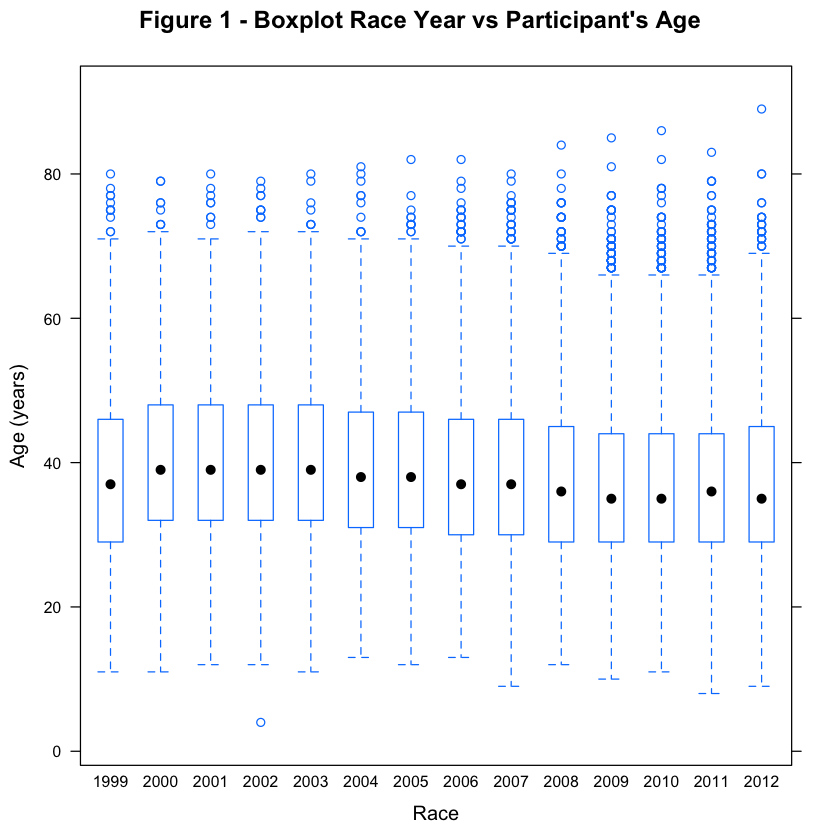

In [48]:
# Library
knitr::opts_chunk$set(echo = FALSE,warning = FALSE, message= FALSE)
library(mosaic)
library(gmodels)
library(RColorBrewer)
library(pander)
library(car)

# Load data
files = sapply(1999:2012,function(year){paste0("./MensResults",year,".csv")})
load.files = function(fileName) {
  read.csv(fileName,stringsAsFactors = FALSE)
}
mensResults = do.call(rbind,lapply(files, load.files))

## Convert to number
mensResults$Age = as.numeric(mensResults$Age)

## Convert to factor
mensResults$Race = sapply(mensResults$Race,function(x) { 
  r = strsplit(x, " ")[[1]][1]
  return (r)
})
mensResults$Race = as.factor(mensResults$Race)
bwplot(Age ~ Race,data=mensResults, ylab = "Age (years)", xlab = "Race", main="Figure 1 - Boxplot Race Year vs Participant's Age")

The Boxplots in Figure 1 shows what appears to be a wandering mean over the years.  However, the standard deviation away from the mean hovers around a stable 10.5 years. The mean appears to decrease in general over time while the number of participants increases.  This portends a trend of increasing popularity that damps the affect of multi-year participant's increasing ages on the mean. This increase in popularity is evident in the number of participants each year.  In 2000 there were 3,036 participants as opposed to the 7,214 participants in 2012.

It must also be noted that there are a lot more outliers toward the top (older age). This signifies that much older men are also competing but not in as much quantity as younger participants. The oldest participant was in 2012 data set and was age 89. Another point to mention is the minimum age in the 2002 dataset. The minimum age is four and it is hard to believe that a four year old ran the 10 miler. After investigating, it seems to be a typo since the time was 1:28:56 which coincides with a plausible time.


The wandering nature of the mean, and the fact that this data comes from a time series suggests that there may be some autocorrelation in the data between the groups.  The Durbin Watson test reports a test statistic, with a value from 0 to 4, where:

- 2 is no autocorrelation.
- 0 to <2 is positive autocorrelation (common in time series data).
- >2 to 4 is negative autocorrelation (less common in time series data).

In [52]:
durbinWatsonTest(lm(Age ~ Race,data=mensResults))

 lag Autocorrelation D-W Statistic p-value
   1      0.04937594      1.901212       0
 Alternative hypothesis: rho != 0

With a p-value of .049 and a DW Statistic 0f 1.9, there is weak evidence of positive serial autocorrelation indicating that the data is weakly dependent on the prior year's age distribution, and that it the signal is possible stationary and wandering around a group mean. 

Considering the weak evidence of autocorrelation, it is also reasonable to consider the data from successive years as independent observations.  

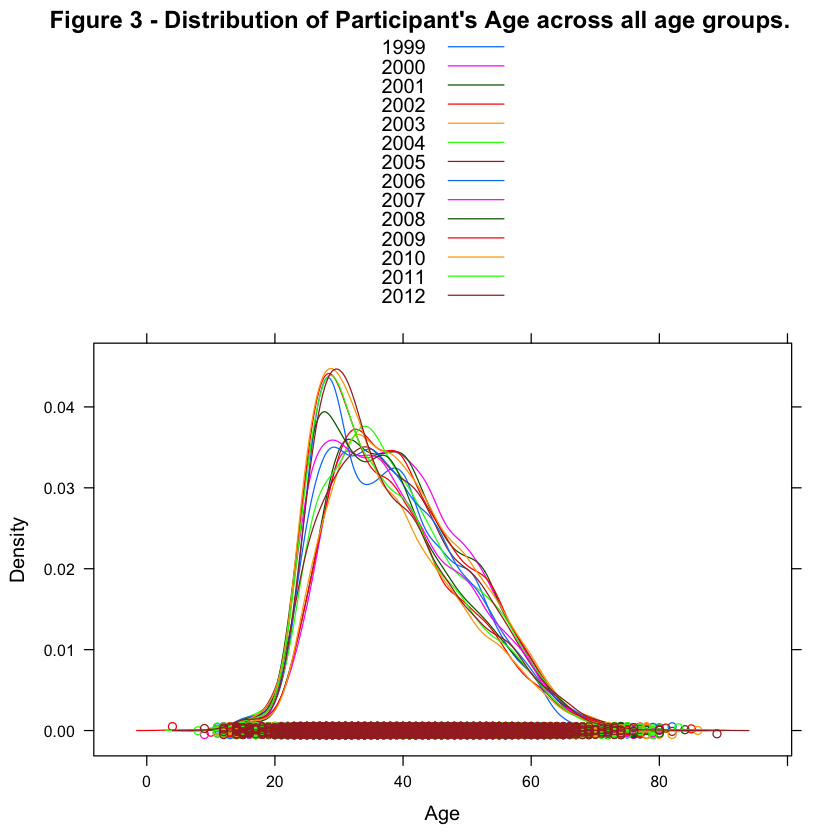

In [62]:
densityplot(~Age,data=mensResults,groups = Race,auto.key=TRUE,
            main = "Figure 3 - Distribution of Participant's Age across all age groups.")

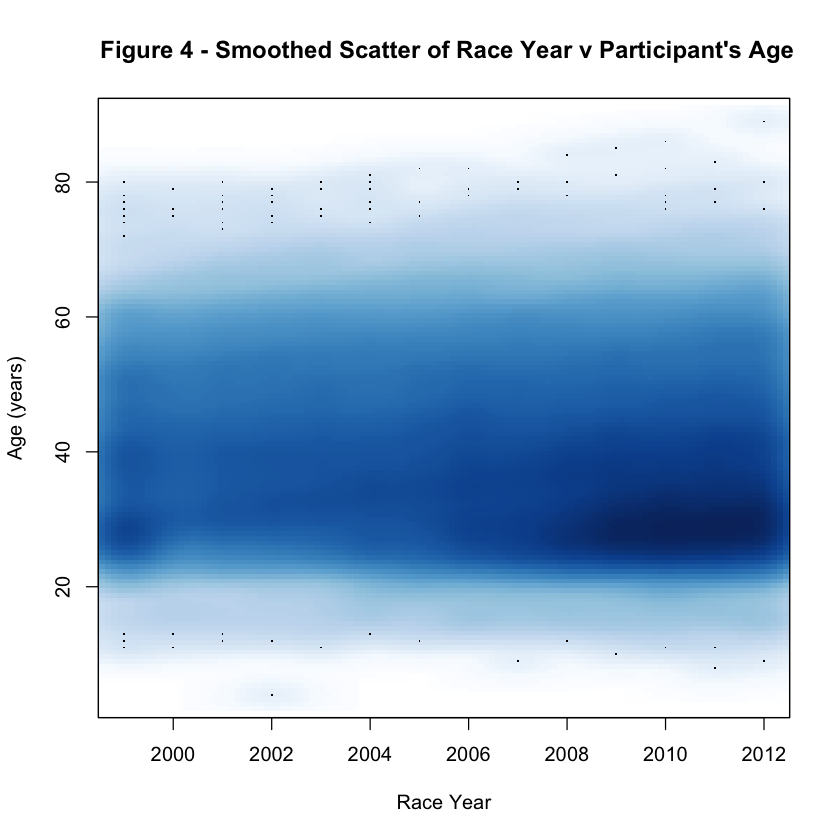

In [65]:
smoothScatter(y = mensResults$Age, x = as.character(mensResults$Race),ylab = "Age (years)", xlab = "Race Year", 
              main=" Figure 4 - Smoothed Scatter of Race Year v Participant's Age")

The density plot in Figure 3 indicates the data across the years of the Cherry Blossom Race appear generally normal with a slight right skew to the distribution.  The smooth scatter plot in Figure 4 shows a darker color from about 2008 until 2012 in the 20 to 30 age range. While it is not an abrupt change it is noticeable. This illustrates a collection of younger individuals in later years of the race  which likely contributes to the downward trend in the mean.

### ANOVA Analysis

In [68]:
anova(lm(Age ~ Race, data=mensResults))

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
,<int>,<dbl>,<dbl>,<dbl>,<dbl>
Race,13,92977.18,7152.0911,60.93163,5.593939e-160
Residuals,71634,8408323.62,117.3789,NA,NA


Our null hypothesis is that there is no change. From our ANOVA we can see that the p-value is smaller than 0.05 therefore we reject the null and believe that there is a change. ANOVA analysis indicated that there is a strong statistically significant difference between the distribution of men's ages year over year versus the overall group mean. 

In [84]:
summary(lm(Age~Race,data=mensResults))


Call:
lm(formula = Age ~ Race, data = mensResults)

Residuals:
    Min      1Q  Median      3Q     Max 
-36.226  -8.498  -1.727   7.142  51.273 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  38.1165     0.1596 238.822  < 2e-16 ***
Race2000      2.2023     0.2532   8.696  < 2e-16 ***
Race2001      2.1042     0.2415   8.714  < 2e-16 ***
Race2002      2.1091     0.2384   8.845  < 2e-16 ***
Race2003      2.1862     0.2351   9.300  < 2e-16 ***
Race2004      1.1437     0.2317   4.936 7.98e-07 ***
Race2005      1.3821     0.2293   6.029 1.66e-09 ***
Race2006      0.7418     0.2187   3.392 0.000693 ***
Race2007      0.3075     0.2188   1.405 0.159958    
Race2008     -0.3758     0.2128  -1.766 0.077398 .  
Race2009     -0.7753     0.2075  -3.736 0.000187 ***
Race2010     -1.1692     0.2060  -5.677 1.38e-08 ***
Race2011     -0.6183     0.2054  -3.011 0.002606 ** 
Race2012     -0.3893     0.2043  -1.906 0.056706 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 

By default, the use of the linear model (regression) function displays the pairwise differences between the first group and each of the other groups. The overall test of the model indicates a significant difference between 1999 all other years except for 2007, 2008, and 2012. However, the cyclical nature of the significance values again points to serial correlation underlying signal stationarity as a mechanism impacting the shifting mean.

### Individual to Group Comparison

The table below displays the differences between the grand mean and the group means. Serial correlation is again evident in the pair.  We note that from 2007 to 2012 the group means are definitely decreasing in age. The most dramatic change occurs in 2010 when the grand mean decreases by 1.5 years.

In [83]:
# Convert AOV results to tables.
results = model.tables(aov(lm(Age ~ Race,data=mensResults)))
results$tables$Race


Race
      1999       2000       2001       2002       2003       2004       2005 
-0.3393869  1.8629172  1.7647759  1.7697450  1.8467916  0.8043506  1.0426922 
      2006       2007       2008       2009       2010       2011       2012 
 0.4024432 -0.0318546 -0.7152077 -1.1146464 -1.5086234 -0.9577018 -0.7287263 

## Conclusion
From our analysis we believe the age distributions did change over the years. While the term gradual is subjective, we do believe that it was indeed gradual as no abrupt changes were noticed. We can speculate why the change occur. One theory would be that the data behaves cyclically, and we are seeing just a part of a cycle. We could perform further analysis since the data is available from 1973 to 2019. We could see a greater span of data and observe if there is a cyclical trend. But we should keep in mind that there is a lot of information missing in the older datasets, so data integrity is definitely a cause for concern. 
Another theory would be that this was just an isolated surge. Further investigation could be done by seeing if the trend continues today. There is no reason to anticipate data integrity loss from 2012 to 2019. 

## References

- [1]: http://rdatasciencecases.org/ "Data Science in R. A Case Studies Approach to Computational Reasoning and Problem Solving", Deborah Nolan, Duncan Temple Lang, chapter 1 Predicting Location via Indoor Positioning Systems
- [2]: http://www.cballtimeresults.org/performances?utf8=%E2%9C%93&section=10M&year=2019&division=Overall+Men Credit Union Cheery Blossom Ten Mile Run Race Results

## Appendix

### Residual Analysis


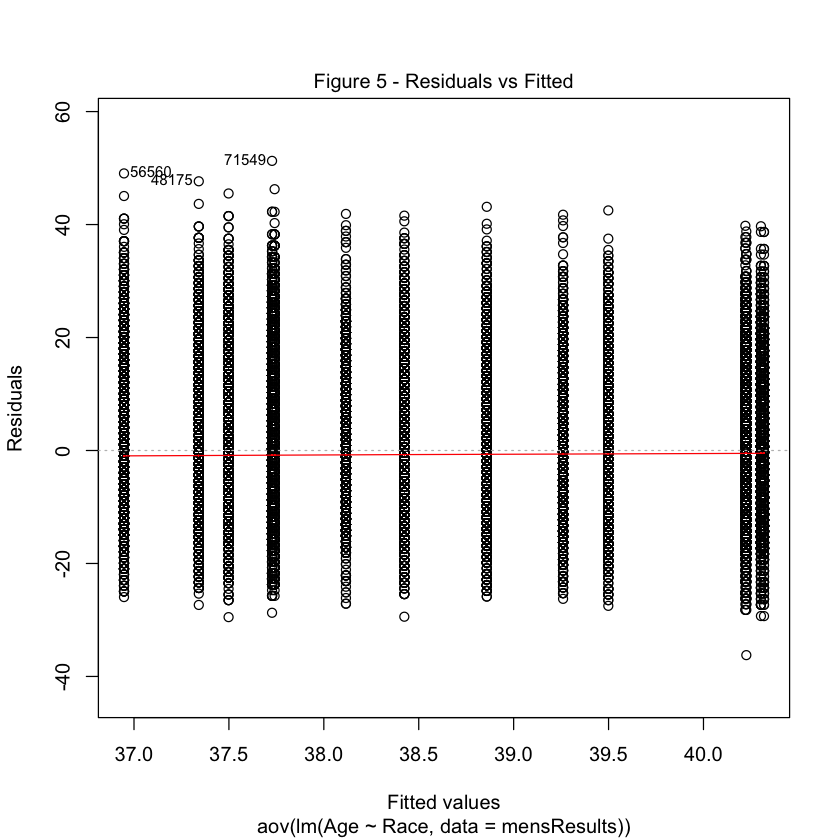

In [88]:
aov1 = aov(lm(Age ~ Race, data=mensResults))
plot(aov1,which=1,"Figure 5 - Residuals vs Fitted")

The residuals versus fitted graph in Figure-5 does not exhibit a dramatic lack of fit. However, the Q-Q plot in Figure-6 does show a break from normality and a slight right skew as observed in the density plot.

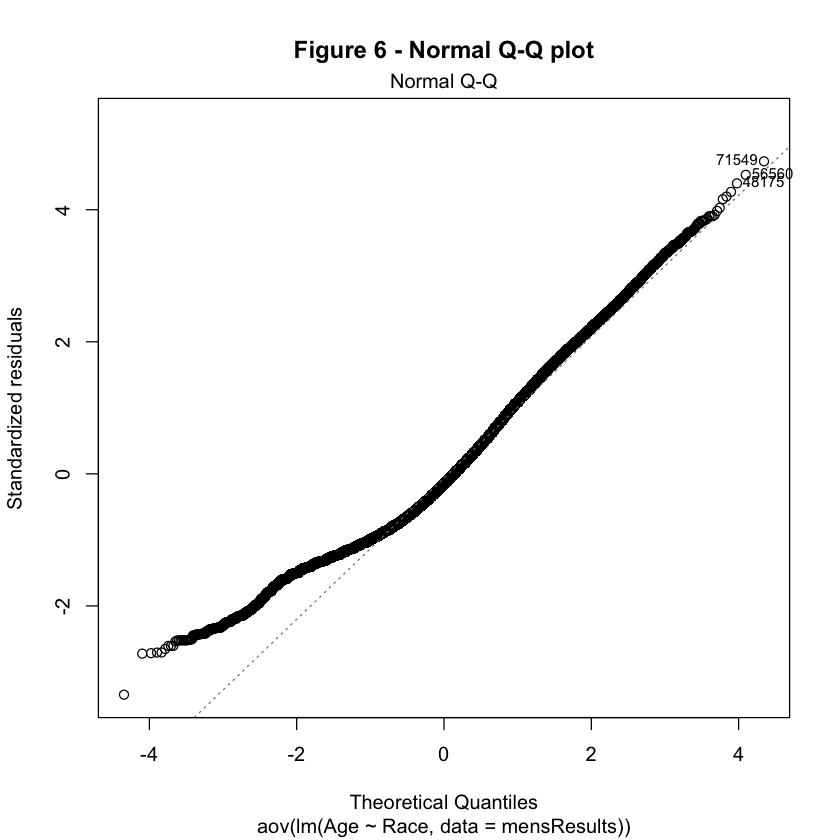

In [93]:
plot(aov1,which=2, main="Figure 6 - Normal Q-Q plot")

In [38]:
favstats(Age ~ Race, data = mensResults, main="test")

Race,min,Q1,median,Q3,max,mean,sd,n,missing
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1999,11,29,37,46,80,38.11654,10.48660,4608,2
2000,11,32,39,48,79,40.31884,10.53879,3036,0
2001,12,32,39,48,80,40.22070,10.61274,3575,3
2002,4,32,39,48,79,40.22567,10.71086,3740,3
2003,11,32,39,48,80,40.30272,10.75946,3941,2
2004,13,31,38,47,81,39.26027,10.95626,4161,0
2005,12,31,38,47,82,39.49862,11.06214,4334,10
2006,13,30,37,46,82,38.85837,10.95428,5253,1
2007,9,30,37,46,80,38.42407,11.14361,5235,2


### cbreaddata.r

```{r}
library(rvest)

# Default the URI to the URI of the mens overall results
uri = "http://www.cballtimeresults.org/performances?utf8=%E2%9C%93&section=10M&&division=Overall+Men&year="

# Loops over every page with data for the selected year
#   uri - Web address of data source
#   year - Sets teh query string parameter to the specified year
getResults <- function(uri, year = 1999) 
{
  page = 1
  url <- paste0(uri, '&year=',year,'&page=',page);
  
  results <- as.data.frame( read_html(url) %>%
                             html_nodes(xpath='//*[@id="performances-index"]/div/table') %>%
                             html_table());
  
  while( page < 500 )
  {
    page = page + 1;
    result <- as.data.frame( read_html(url) %>%
                              html_nodes(xpath='//*[@id="performances-index"]/div/table') %>%
                              html_table());

    if (nrow(result) == 0) return (results);
        
    results <- rbind(results, result);
    url <- paste0(uri, '&year=',year,'&page=',page);
    print.default(url,quote = FALSE)
  }
  return (results);
}

# Loops over the selected years and preserves each year's data in a csv file named MensResults{`year'}.csv
#   startyear : year to start at
#   endyear   : year to end at
getAll = function (startyear = 1999, endyear = 2012) {

  for (year in startyear:endyear) {
    mensResults = getResults(uri,year)
    fileName = paste0("MensResults",year,".csv")
    write.csv(mensResults, file = fileName)
  }

  write.csv(mensResults, file = "MensResults.csv")
}
```